In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


In [3]:
#read the dataset files
train_data = pd.read_csv("TrainSet.csv")
test_data = pd.read_csv("TestSet.csv")
print(train_data)

                                         File_Name        Em        Ed  \
0                  01-anarchy_in_the_uk.mp3         0.228523  0.005756   
1                     01-angel_of_death.mp3         0.231866  0.007204   
2              01-back_to_the_primitive.mp3         0.332185  0.006607   
3                   01-born_on_the_cusp.mp3         0.347160  0.008825   
4          01-cold_cash_and_cold_hearts.mp3         0.307836  0.009545   
5             01-first_strike_is_deadly.mp3         0.198574  0.007090   
6                           01-one_time.mp3         0.279084  0.007395   
7              01-optimist_or_pessimist.mp3         0.215439  0.005127   
8                       01-plastic_bomb.mp3         0.175718  0.005626   
9       01-the_bee_and_the_cracking_egg.mp3         0.279263  0.005844   
10          01-the_seven_tongues_of_god.mp3         0.188888  0.004636   
11                       01-true_nature.mp3         0.297891  0.007218   
12               01-what_tomorrow_know

In [4]:
# Combine train and test data for label encoding to ensure consistent encoding
combined_data = pd.concat([train_data, test_data])

# Perform label encoding for the File_Name variable in combined data
if 'File_Name' in combined_data.columns:
    label_encoder = LabelEncoder()
    combined_data['File_Name_encoded'] = label_encoder.fit_transform(combined_data['File_Name'])

# Separate features and target from the combined data
X_train = combined_data[combined_data.index.isin(train_data.index)].drop(columns=["class", "File_Name"])  # Features
y_train = combined_data[combined_data.index.isin(train_data.index)]["class"]  # Target

X_test = combined_data[combined_data.index.isin(test_data.index)].drop(columns=["class", "File_Name"])  # Test features
y_test = combined_data[combined_data.index.isin(test_data.index)]["class"]  # Test target

# Check for missing values in features
print("Missing values in features before imputation:")
print(X_train.isnull().sum())
print(X_test.isnull().sum())

# Impute missing values only for numerical features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


print("Missing values after imputation:")
print(X_train_imputed.isnull().sum())
print(X_test_imputed.isnull().sum())

print(X_train_imputed)


Missing values in features before imputation:
Em                   0
Ed                   0
El                   0
LEm                  0
ATm                  0
                    ..
RTm                  0
RTd                  0
RGm                  0
RGd                  0
File_Name_encoded    0
Length: 67, dtype: int64
Em                   0
Ed                   0
El                   0
LEm                  0
ATm                  0
                    ..
RTm                  0
RTd                  0
RGm                  0
RGd                  0
File_Name_encoded    0
Length: 67, dtype: int64
Missing values after imputation:
Em                   0
Ed                   0
El                   0
LEm                  0
ATm                  0
                    ..
RTm                  0
RTd                  0
RGm                  0
RGd                  0
File_Name_encoded    0
Length: 67, dtype: int64
Em                   0
Ed                   0
El                   0
LEm               

In [5]:
#choose best features for our given goal
selector = SelectKBest(score_func=f_classif, k = 5)
X_train_selected = selector.fit_transform(X_train_imputed,y_train)
selected_features = X_train.columns[selector.get_support()]

print("Selected features:", selected_features)

Selected features: Index(['EDm', 'SEm', 'SFm', 'RSm', 'RSd'], dtype='object')


C:\Users\Usuari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Usuari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [6]:
#model = RandomForestClassifier(n_estimators=100, random_state=42)
#model = KNeighborsClassifier()
#train an MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

model.fit(X_train_selected, y_train)

C:\Users\Usuari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

In [7]:
#adapt the test dataset to the selected features
X_test = test_data[selected_features]
y_test = test_data["class"]

for column in X_test.columns:
    # Convert values to floats with error handling
    X_test[column] = pd.to_numeric(X_test[column], errors='coerce')

rows_with_nan = X_test[X_test.isna().any(axis=1)].index
y_test = y_test.drop(rows_with_nan)       
X_test.dropna(inplace = True)

print(y_train)
    

0     aggressive
1     aggressive
2     aggressive
3     aggressive
4     aggressive
         ...    
15           sad
16           sad
17           sad
18           sad
19           sad
Name: class, Length: 80, dtype: object


C:\Users\Usuari\AppData\Local\Temp\ipykernel_9680\2275420278.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = pd.to_numeric(X_test[column], errors='coerce')
C:\Users\Usuari\AppData\Local\Temp\ipykernel_9680\2275420278.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.dropna(inplace = True)


In [8]:
y_pred = model.predict(X_test)

C:\Users\Usuari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [9]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
print(selected_features)
print(y_test)
print(y_pred)

Accuracy: 0.95
Index(['EDm', 'SEm', 'SFm', 'RSm', 'RSd'], dtype='object')
0     aggressive
1     aggressive
2     aggressive
3     aggressive
4     aggressive
5          happy
6          happy
7          happy
8          happy
9          happy
10       relaxed
11       relaxed
12       relaxed
13       relaxed
14       relaxed
15           sad
16           sad
17           sad
18           sad
19           sad
Name: class, dtype: object
['aggressive' 'aggressive' 'aggressive' 'aggressive' 'aggressive' 'happy'
 'happy' 'happy' 'happy' 'relaxed' 'relaxed' 'relaxed' 'relaxed' 'relaxed'
 'relaxed' 'sad' 'sad' 'sad' 'sad' 'sad']


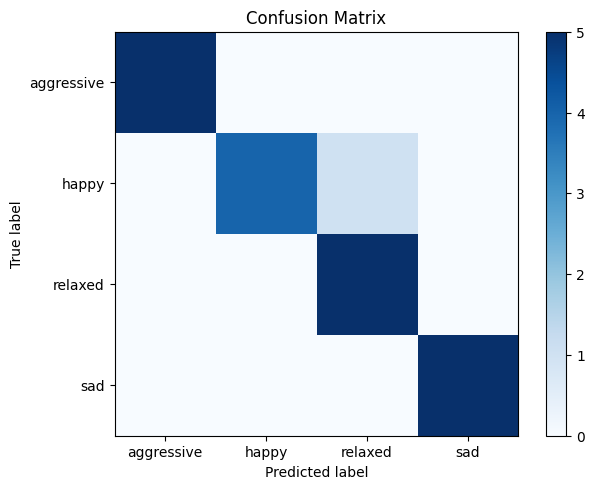

In [10]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()